In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [10]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

### Importing data


In [2]:
def load_data(file_name):
    print('*******************************')
    print('loading data...')
    df = pd.read_csv(file_name)
    global n 
    n = len(df)
    global m 
    m = len(df.columns)

    print('Number of data points:', n)
    print('Number of attributes:', m)
    print('Attribute list:\n')
    print(df.dtypes)

    print('*******************************')
    return df

wine_df = load_data('winequality-red.csv')

*******************************
loading data...
Number of data points: 1599
Number of attributes: 12
Attribute list:

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
*******************************


### Data exploration

Let's see the features available and the values we would expect to see.

In [11]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5
1,7.8000,0.8800,0.0000,2.6000,0.0980,25.0000,67.0000,0.9968,3.2000,0.6800,9.8000,5
2,7.8000,0.7600,0.0400,2.3000,0.0920,15.0000,54.0000,0.9970,3.2600,0.6500,9.8000,5
3,11.2000,0.2800,0.5600,1.9000,0.0750,17.0000,60.0000,0.9980,3.1600,0.5800,9.8000,6
4,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2000,0.6000,0.0800,2.0000,0.0900,32.0000,44.0000,0.9949,3.4500,0.5800,10.5000,5
1595,5.9000,0.5500,0.1000,2.2000,0.0620,39.0000,51.0000,0.9951,3.5200,0.7600,11.2000,6
1596,6.3000,0.5100,0.1300,2.3000,0.0760,29.0000,40.0000,0.9957,3.4200,0.7500,11.0000,6
1597,5.9000,0.6450,0.1200,2.0000,0.0750,32.0000,44.0000,0.9955,3.5700,0.7100,10.2000,5


In [12]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000
mean,8.3196,0.5278,0.2710,2.5388,0.0875,15.8749,46.4678,0.9967,3.3111,0.6581,10.4230,5.6360
std,1.7411,0.1791,0.1948,1.4099,0.0471,10.4602,32.8953,0.0019,0.1544,0.1695,1.0657,0.8076
min,4.6000,0.1200,0.0000,0.9000,0.0120,1.0000,6.0000,0.9901,2.7400,0.3300,8.4000,3.0000
25%,7.1000,0.3900,0.0900,1.9000,0.0700,7.0000,22.0000,0.9956,3.2100,0.5500,9.5000,5.0000
50%,7.9000,0.5200,0.2600,2.2000,0.0790,14.0000,38.0000,0.9968,3.3100,0.6200,10.2000,6.0000
75%,9.2000,0.6400,0.4200,2.6000,0.0900,21.0000,62.0000,0.9978,3.4000,0.7300,11.1000,6.0000
max,15.9000,1.5800,1.0000,15.5000,0.6110,72.0000,289.0000,1.0037,4.0100,2.0000,14.9000,8.0000


From data exploration, we can make a couple of observations. We note that the target label is encoded as a discrete quality measurement. We're met with the choice to approach this as a regression or a classifcation task. I chose to approach it as a regression task, as quality has the property of being 'well-ordered' (classes can be numarically compared). We also note that our features display a considerable amount of range. For instance, 'total sulfur dioxide' has a range of [6-289], meanwhile, 'chlorides' range from [0.012 - 0.611]. This difference in range means we may want to consider normalizing our data. I will create a copy of the data that is zero-mean normalized. This will ensure data features will have a similar range, and a mean of zero.

In [13]:
wine_df_norm = (wine_df-wine_df.mean())/wine_df.std()
wine_df_norm['quality'] = wine_df['quality']

wine_df_norm.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000
mean,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,5.6360
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8076
min,-2.1364,-2.2776,-1.3910,-1.1623,-1.6034,-1.4221,-1.2302,-3.5376,-3.6992,-1.9359,-1.8983,3.0000
25%,-0.7005,-0.7697,-0.9290,-0.4531,-0.3711,-0.8485,-0.7438,-0.6076,-0.6549,-0.6380,-0.8661,5.0000
50%,-0.2410,-0.0437,-0.0563,-0.2403,-0.1799,-0.1792,-0.2574,0.0018,-0.0072,-0.2251,-0.2092,6.0000
75%,0.5056,0.6265,0.7650,0.0434,0.0538,0.4900,0.4722,0.5766,0.5757,0.4239,0.6353,6.0000
max,4.3538,5.8761,3.7424,9.1928,11.1236,5.3656,7.3728,3.6789,4.5269,7.9162,4.2011,8.0000


In the normalized dataset we can observe that the mean of all features is 0 (very slight deviations due to floating point approximations), and the rane of each feture is much more comparable now.

Let's check for any missing values in the data.

In [5]:
wine_df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Luckily there is no missing data.

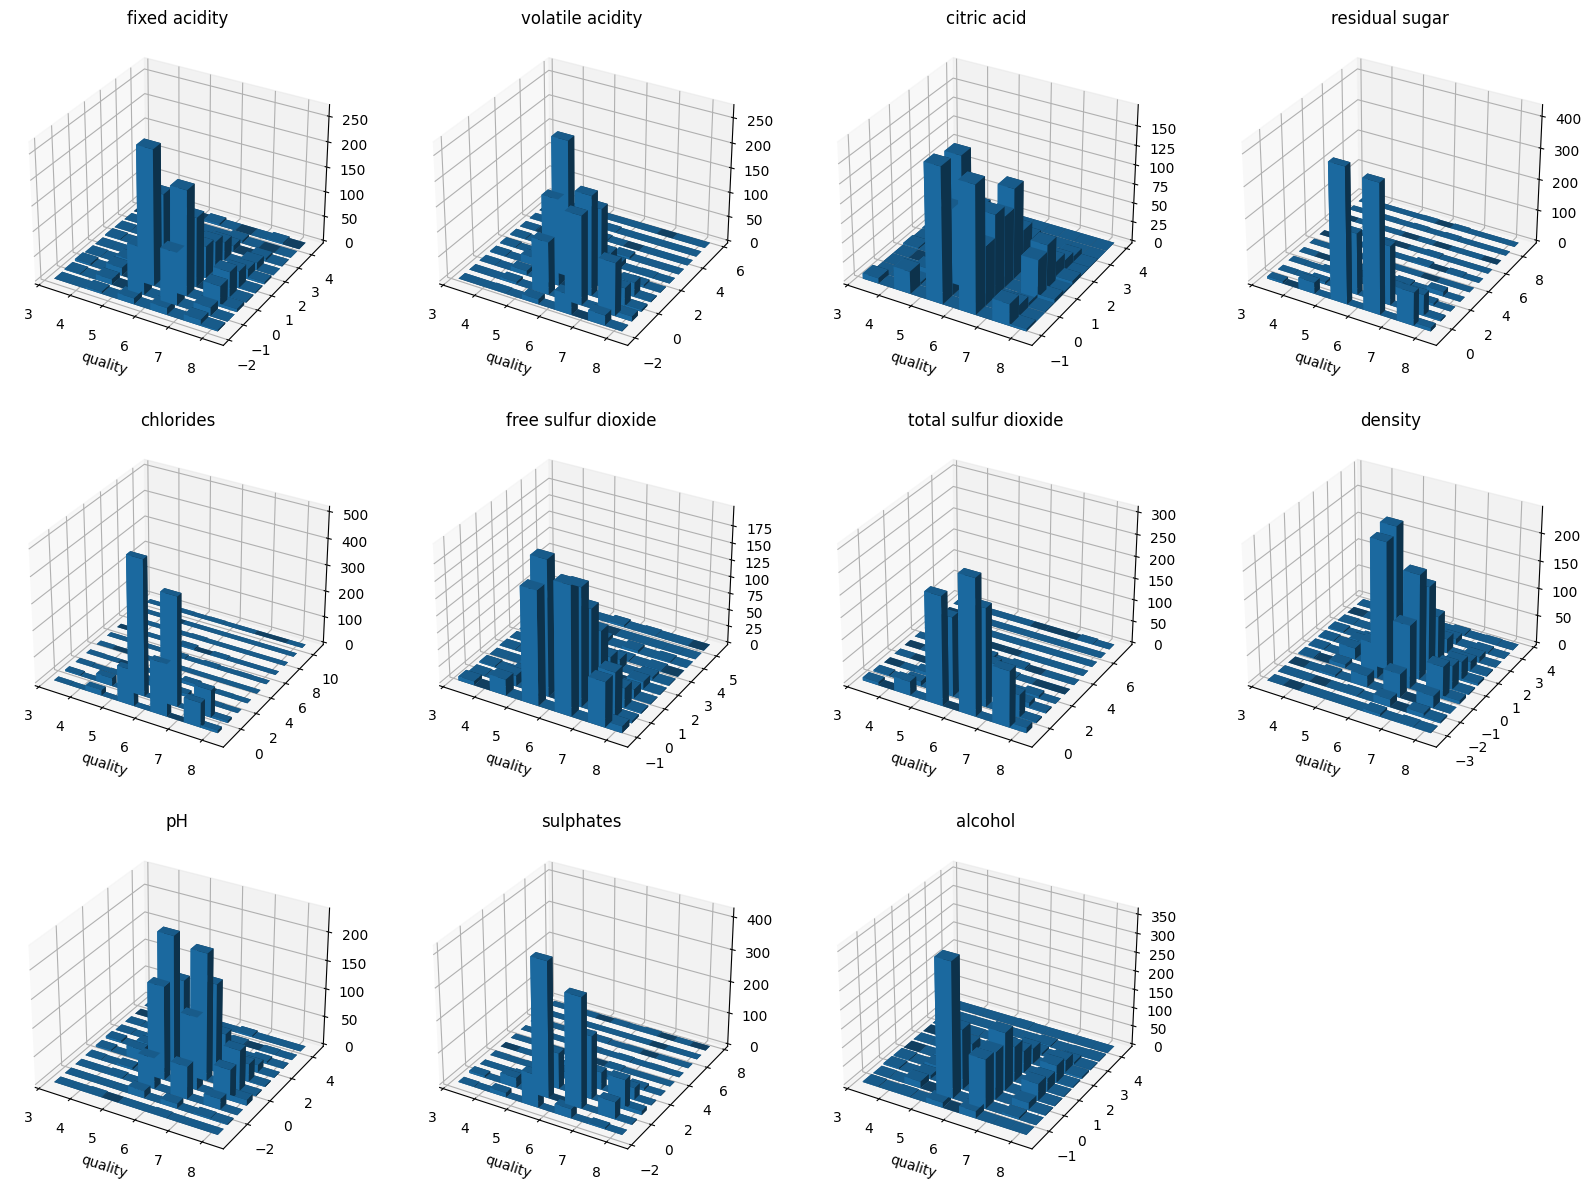

In [7]:
def corr_analysis(df, target_col):
    """
    target_series = df[target_col]
    temp_df = df.drop([target_col], axis = 1)
    fig_rows = fig_cols = int(np.ceil(np.sqrt(m-1)))
    plt.figure(1, figsize=(fig_rows*4,fig_cols*4))
    plt.tight_layout()
    for i,col in enumerate(temp_df.columns, start = 1):
        plt.subplot(fig_rows,fig_cols,i)
        plt.scatter(df[col],target_series)
        plt.title(col)
    plt.plot()
    """

    target_series = df[target_col]
    temp_df = df.drop([target_col], axis = 1)
    fig_rows = fig_cols = int(np.ceil(np.sqrt(m-1)))
    fig = plt.figure(1, figsize=(fig_rows*5, fig_cols*5))
    fig.tight_layout()

    for i,col in enumerate(temp_df.columns, start = 1):
        ax = fig.add_subplot(fig_rows, fig_cols, i, projection = '3d')

        hist,x_edges, y_edges = np.histogram2d(target_series, df[col], bins=10)
         # Construct arrays for the anchor positions of the 16 bars.
        xpos, ypos = np.meshgrid(x_edges[:-1] + 0.25, y_edges[:-1] + 0.25, indexing="ij")
        xpos = xpos.ravel()
        ypos = ypos.ravel()
        zpos = 0
        # Construct arrays with the dimensions for the 16 bars.
        dx = dy = 0.5 * np.ones_like(zpos)
        dz = hist.ravel()

        ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
        ax.set_title(col)
        ax.set_xlabel('quality')
    plt.show()

        

corr_analysis(normalized_df, 'quality')

In [8]:
for i, col in enumerate(wine_df.loc[:,wine_df.columns != target_col].columns):
    print(i, col)

NameError: name 'target_col' is not defined